In [14]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

# Visualized Single Qubit Transformations



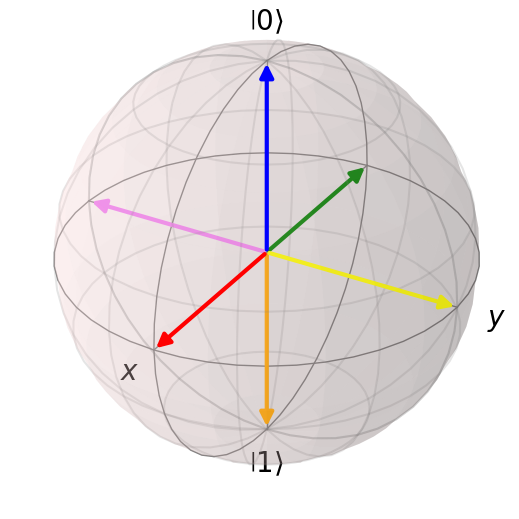

In [15]:
# INPUT SPACE
state = np.array([1,0])

assure_normalization = True




# create plot
bloch_sphere = qt.Bloch()

if assure_normalization:
    state = go.normalization_check(state)

# SEQUENCE
go.plot_bloch_state(state, bloch_sphere, "blue")

state = go.gate_operation(state, go.H())

go.plot_bloch_state(state, bloch_sphere, "red")

state = go.gate_operation(state, go.R_z(np.pi/2))
state = go.gate_operation(state, go.R_x(np.pi))

go.plot_bloch_state(state, bloch_sphere, "violet")

state = go.gate_operation(state, go.R_x(np.pi/2))
state = go.gate_operation(state, go.R_y(np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "green")

state = go.gate_operation(state, go.R_z(-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "yellow")

state = go.gate_operation(state, go.R(np.array([1,0,0]),-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "orange")




bloch_sphere.show()


# Generating specific states

### Bell states

$\begin{aligned}
    \ket{\Phi^+} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \ \ \ \ \ \ket{\Phi^-} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\[8pt]
    \ket{\Psi^+} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \ \ \ \ \ \ket{\Psi^-} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\end{aligned}$

In [16]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 2, 1)
CNOT12 = go.CNOT(2,1,2)
X1 = go.single_qubit_gate_to_full_gate(go.X(), 2, 1)
X2 = go.single_qubit_gate_to_full_gate(go.X(), 2, 2)

phi_plus  = np.array([1,0,0,0])
phi_plus = go.gate_operation(phi_plus, H1)
phi_plus = go.gate_operation(phi_plus, CNOT12)

print("Phi+ = " + str(phi_plus))

phi_minus  = np.array([1,0,0,0])
phi_minus = go.gate_operation(phi_minus, X1)
phi_minus = go.gate_operation(phi_minus, H1)
phi_minus = go.gate_operation(phi_minus, CNOT12)

print("Phi- = " + str(phi_minus))

psi_plus  = np.array([1,0,0,0])
psi_plus = go.gate_operation(psi_plus, X2)
psi_plus = go.gate_operation(psi_plus, H1)
psi_plus = go.gate_operation(psi_plus, CNOT12)

print("Psi+ = " + str(psi_plus))

psi_minus  = np.array([1,0,0,0])
psi_minus = go.gate_operation(psi_minus, X1)
psi_minus = go.gate_operation(psi_minus, X2)
psi_minus = go.gate_operation(psi_minus, H1)
psi_minus = go.gate_operation(psi_minus, CNOT12)

print("Psi+ = " + str(psi_minus))



Phi+ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Phi- = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Psi+ = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Psi+ = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


### Greenberger–Horne–Zeilinger state

$\ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$

In [17]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 3, 1)
CNOT12 = go.CNOT(3,1,2)
CNOT23 = go.CNOT(3,2,3)

GHZ = np.zeros((2**3,))
GHZ[0] = 1

GHZ = go.gate_operation(GHZ, H1)
GHZ = go.gate_operation(GHZ, CNOT12)
GHZ = go.gate_operation(GHZ, CNOT23)

print("GHZ = " + str(GHZ))

GHZ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Instructional Syntax

### Single Instruction

In [18]:
state = np.array([2,4,3,0.1])
state = go.normalization_check(state)

instruction = go.instruction("CNOT",[1,2]) # Directly create instruction object

state1 = go.gate_operation(state, go.CNOT(2,1,2))
state2 = go.apply_instruction(state, instruction, 2)

print(state1)
print(state2)

[0.37132666 0.74265332 0.01856633 0.55698999]
[0.37132666 0.74265332 0.01856633 0.55698999]


### Instruction List

In [19]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate = go.single_qubit_gate_to_full_gate(go.H(),2,1)
state1 = go.gate_operation(state, gate)

inst = go.instruction.create_from_list(["H",[1]]) # Create instruction objects automatically from list syntax
state2 = go.apply_instruction(state, inst, 2)

print(state1)
print(state2)

[0.71153193+0.j 0.69957698+0.j 0.06551875+0.j 0.00465288+0.j]
[0.71153193+0.j 0.69957698+0.j 0.06551875+0.j 0.00465288+0.j]


In [20]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate1 = go.single_qubit_gate_to_full_gate(go.H(),2,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),2,2)
instructions = go.create_instruction_list([["H",[1]],["X",[2]]]) # create list of instruction objects from list syntax
 
state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state2 = reduce(go.apply_instruction, instructions, state)  # apply list of instructions

print(state1)
print(state2)

[ 0.14256687+0.j  0.984509  +0.j -0.03696114+0.j -0.09513459+0.j]
[ 0.14256687+0.j  0.984509  +0.j -0.03696114+0.j -0.09513459+0.j]


In [21]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

# Computation with direct gate functions
gate1 = go.single_qubit_gate_to_full_gate(go.H(),3,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),3,2)
gate3 = go.single_qubit_gate_to_full_gate(go.R_x(np.pi),3,2)
gate4 = go.CNOT(3,2,1)
gate5 = go.single_qubit_gate_to_full_gate(go.R(np.array([0,1,0]),np.pi),3,3)
gate6 = go.single_qubit_gate_to_full_gate(go.T(),3,1)
gate7 = go.single_qubit_gate_to_full_gate(go.T(),3,2)
gate8 = go.single_qubit_gate_to_full_gate(go.T(),3,3)

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state1 = go.gate_operation(state1, gate3)
state1 = go.gate_operation(state1, gate4)
state1 = go.gate_operation(state1, gate5)
state1 = go.gate_operation(state1, gate6)
state1 = go.gate_operation(state1, gate7)
state1 = go.gate_operation(state1, gate8)


# Computation with instruction list and multiple instructions
instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

state2 = reduce(go.apply_instruction, instructions, state)

print(state1)
print(state2)

print("Are they the same?")
print(np.allclose(state1,state2))

[-3.13633260e-17+3.89938686e-01j  1.98024814e-01-1.98024814e-01j
  1.43495498e-01-1.43495498e-01j -3.44519551e-01+0.00000000e+00j
 -2.60636860e-01+2.60636860e-01j  7.13584796e-02-2.08166817e-17j
 -5.12201984e-01+0.00000000e+00j  3.21199689e-01+3.21199689e-01j]
[-3.13633260e-17+3.89938686e-01j  1.98024814e-01-1.98024814e-01j
  1.43495498e-01-1.43495498e-01j -3.44519551e-01-1.03292098e-17j
 -2.60636860e-01+2.60636860e-01j  7.13584796e-02-1.80512847e-17j
 -5.12201984e-01-4.57295542e-17j  3.21199689e-01+3.21199689e-01j]
Are they the same?
True


### Random Instructions

In [22]:
random_instruction = go.instruction.random_instruction(5) # create any random instruction

print(vars(random_instruction))

{'gate': 'H', 'qubit': [3], 'direction': array([0, 0, 1]), 'angle': 0.0}


In [23]:
random_instruction = go.instruction.random_single_qubit_instruction(5) # create any single qubit random instruction

print(vars(random_instruction))

{'gate': 'Rx', 'qubit': [5], 'direction': array([0, 0, 1]), 'angle': 4.773123218262251}


In [24]:
random_instruction = go.instruction.chunked_random_instruction(10,3) # create any random instruction, but with separate chunks of unentangled qubits

print(vars(random_instruction))

{'gate': 'Ry', 'qubit': [1], 'direction': array([0, 0, 1]), 'angle': 1.8513875690226207}


# Benchmark (1000 random gates)

On my system:
| Qubits | (old) only dense matrices [s]  | Using internal sparse [s] |  
|------|-----|-----|
| 1 | 0.0 | 0.0 |
| 2 | 0.1 | 0.1 |  
| 3 | 0.1 | 0.1 |
| 4 | 0.1 | 0.2 |
| 5 | 0.2 | 0.2 |
| 6 | 0.3 | 0.3 |
| 7 | 0.6 | 0.6 |
| 8 | 2.9 | 3.6 |
| 9 | 15.9 | 7.9 | 
| 10 | 81.6 | 28.2 | 
| 11 | 422.4 | 115.2 | 

In [25]:
qubit_amount = 3


# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1

for gate_number in range(0,1000):
    state = go.apply_instruction(state, go.instruction.random_instruction(qubit_amount), qubit_amount)

print(state)

[-0.28424984+0.03431142j -0.00920022+0.3445132j   0.13812018+0.07723653j
 -0.10052604-0.05059436j -0.01377014-0.62478214j  0.24358515-0.07908648j
 -0.18871185+0.29362273j -0.28895843+0.3163679j ]


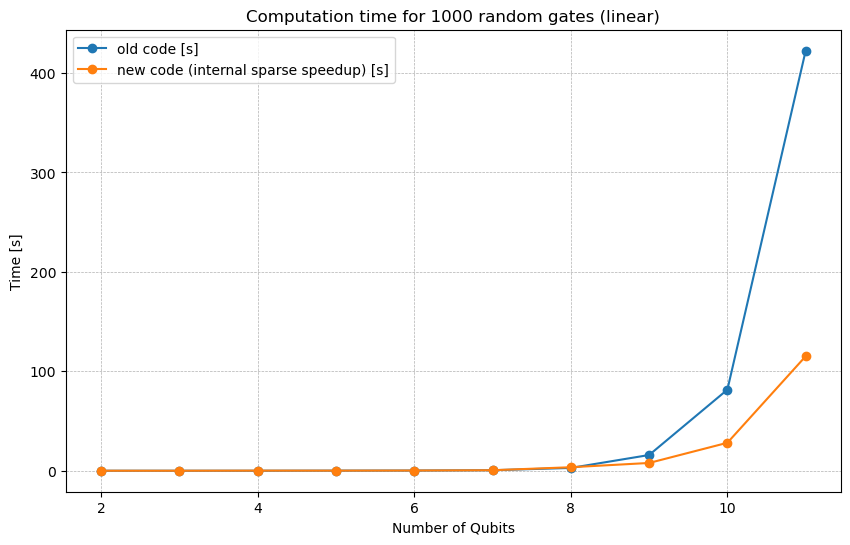

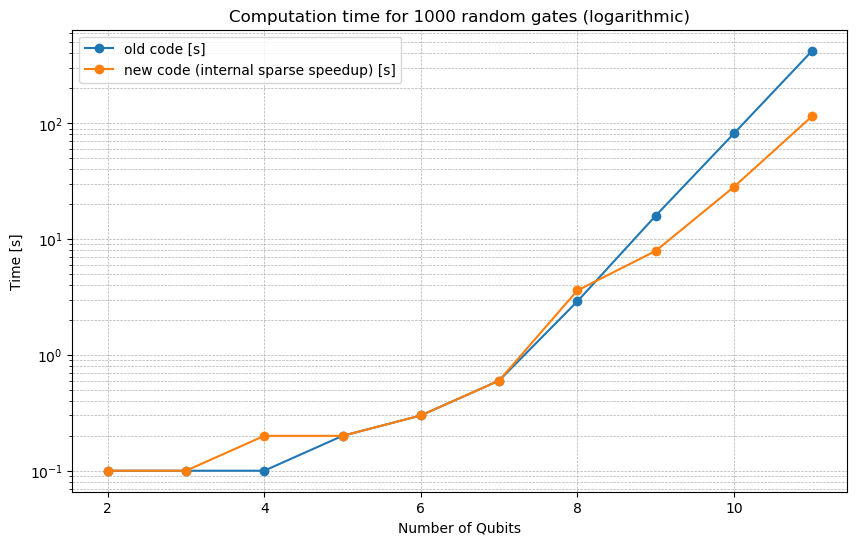

In [ ]:

# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
old_code = [0.1, 0.1, 0.1, 0.2, 0.3, 0.6, 2.9, 15.9, 81.6, 422.4]
sparse_speedup = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Using scipy.sparse

In [ ]:
qubit_amount = random.randint(1, 6)

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
        
# non sparse
Y = go.single_qubit_gate_to_full_gate(go.Y(), qubit_amount, random.randint(1, qubit_amount))
        
# sparse transformation
Y_sparse = csr_matrix(Y)
state_sparse = csr_matrix(state.T)

sol1 = go.gate_operation(state, Y)

sol2 = go.gate_operation(state_sparse, Y_sparse)
        
#convert sparse back 
sol2 = sol2.toarray().T
      
compare = np.allclose(sol1,sol2)

print("Same solution?")
print(compare)
    

Same solution?
True


Calculations are done automatically with sparse matrices when using the instruction syntax and providing the state as a scipy csr_matrix

In [ ]:
qubit_amount = 2

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state) # transform into csr_matrix 

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)
    
    state = go.apply_instruction(state, instr , qubit_amount) # this uses mostly dense matrices
    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount) # this uses only sparse matrices

compare = np.allclose(state,state_sparse.toarray().T)

print(state)
print(state_sparse.toarray().T)
print("Are they the same?")
print(compare)


[ 0.07448789-0.02790357j -0.74326165+0.4428273j  -0.03502933+0.12018592j
 -0.38375536+0.28670397j]
[[ 0.07448789-0.02790357j -0.74326165+0.4428273j  -0.03502933+0.12018592j
  -0.38375536+0.28670397j]]
Are they the same?
True


## Benchmarks

### 1000 random gates

On my system:
| Qubits | All gates [s] | Single Qubit gates [s] | Chunked gates (3) [s] |
|------|-----|-----| -----|
| 1 | 0.1 | 0.1 | 0.1 |
| 2 | 0.5 | 0.4 | 0.5 |
| 3 | 0.8 | 0.6 | 0.6 |
| 4 | 1.0 | 0.8 | 1.1 |
| 5 | 1.3 | 1.1 | 1.5 |
| 6 | 1.7 | 1.4 | 1.8 |
| 7 | 2.1 | 1.6 | 2.1 |
| 8 | 2.7 | 2.3 | 2.8 |
| 9 | 5.4 | 5.5 | 5.5 |
| 10 | 16.7 | 19.0 | 16.9 |
| 11 | 66.4 | 78.2 | 56.5 |
| 12 | 254.0 | 264.6 | 222.5 |

In [ ]:
qubit_amount = 5

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[-0.23733728-0.00037445j  0.02521102-0.172847j    0.11833635-0.23455389j
  -0.03201352+0.02614718j  0.15083696-0.11575119j -0.15375985-0.19582128j
   0.02494776+0.12041524j -0.16874912+0.01926396j -0.01863961-0.00843122j
   0.09204845-0.18538301j  0.05425717-0.02371135j  0.1435047 -0.02637391j
  -0.02397898+0.02409725j -0.00726356-0.12919092j  0.02653004-0.20909495j
  -0.17062975-0.04812824j  0.13075261+0.08665123j -0.11704605+0.0596907j
  -0.18441573-0.16790271j -0.11189865+0.19295908j  0.00794673+0.08445593j
   0.03425649-0.06566858j  0.25716274-0.06738147j  0.02202594-0.25335145j
   0.19875884-0.1818853j  -0.03328864+0.08350361j -0.23828219+0.10636595j
   0.01621997-0.00980172j  0.20725168+0.0268751j  -0.06403855-0.13455857j
   0.0976486 +0.10798571j  0.02124231-0.0041758j ]]


In [ ]:
qubit_amount = 3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_single_qubit_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.2435058 -0.06235055j -0.1374933 -0.04146871j -0.07851644-0.28533489j
  -0.04592459+0.16272379j -0.19097701+0.46507731j  0.23081485-0.17097748j
   0.55148672+0.21503261j -0.20612113-0.26811169j]]


In [ ]:
qubit_amount =  3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.chunked_random_instruction(qubit_amount,3)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.16481875+0.02970642j  0.34308377-0.19968097j  0.11742706-0.2649199j
   0.33021288+0.23817812j  0.31192115-0.35423231j -0.36497418+0.14016007j
  -0.24614203-0.13442318j -0.11212344-0.31269608j]]


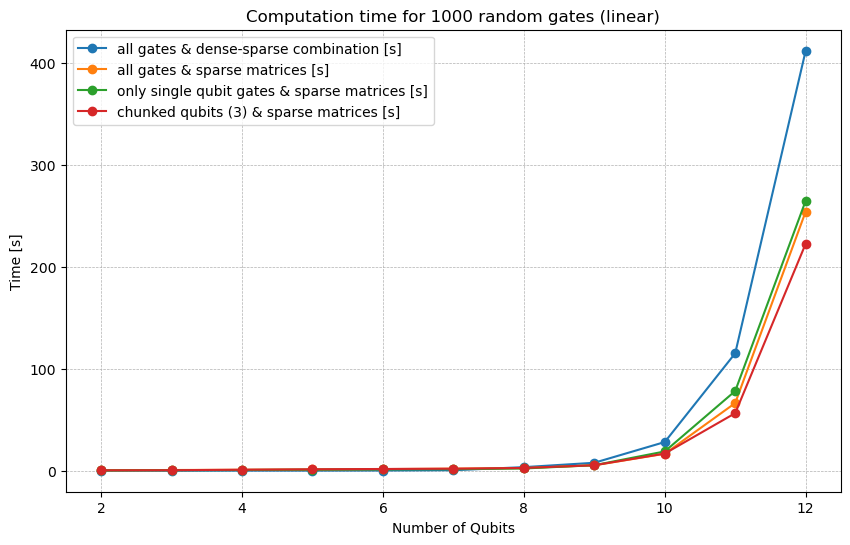

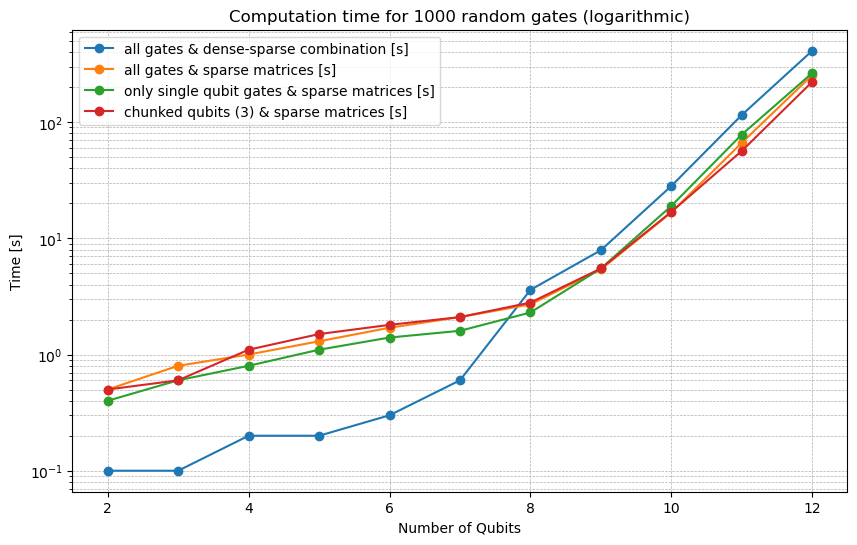

In [32]:
# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
non_sparse = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2,411.6]
all_gates = [0.5, 0.8, 1.0, 1.3, 1.7, 2.1, 2.7, 5.4, 16.7, 66.4, 254.0]
single_qubit_gates = [0.4, 0.6, 0.8, 1.1, 1.4, 1.6, 2.3, 5.5, 19.0, 78.2, 264.6]
chunked_gates = [0.5, 0.6, 1.1, 1.5, 1.8, 2.1, 2.8, 5.5, 16.9, 56.5, 222.5]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()
